In [92]:
# imports
import understand
from understand import *
from matplotlib import pyplot as plt

from numpy.linalg import svd
from scipy.special import logsumexp

In [2]:
def softmax(x, axis=None):
     return np.exp(x - logsumexp(x, axis=axis, keepdims=True))

In [77]:
[x for x in [(v,type(eval(v))) for v in dir()]  if x[1] == Mlp2]


[('net2', understand.Mlp2)]

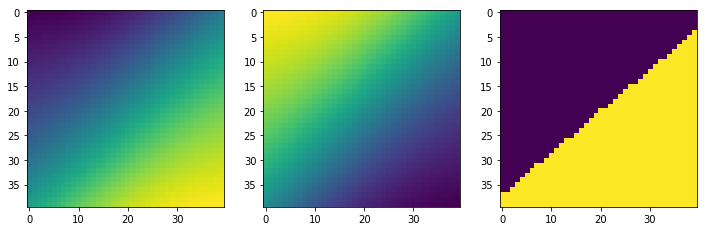

In [4]:
# initialize a 2-layer network

net = start_2h2_net(2)

# evaluate the network on a grid in the range (-1, 1), (-1, 1)
r = np.arange(-1,1,0.05)
res = np.zeros((len(r), len(r),2), np.double)
for i,x1 in enumerate(r):
    for j,x2 in enumerate(r):
        res[i,j,:] = net(torch.FloatTensor([x1,x2])).detach().numpy()
        

# plot the two functions and the resulting classifier
plt.subplots(1,3, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(res[:,:,0])
plt.subplot(1,3,2)
plt.imshow(res[:,:,1])
plt.subplot(1,3,3)
plt.imshow(res[:,:,1] < res[:,:,0])

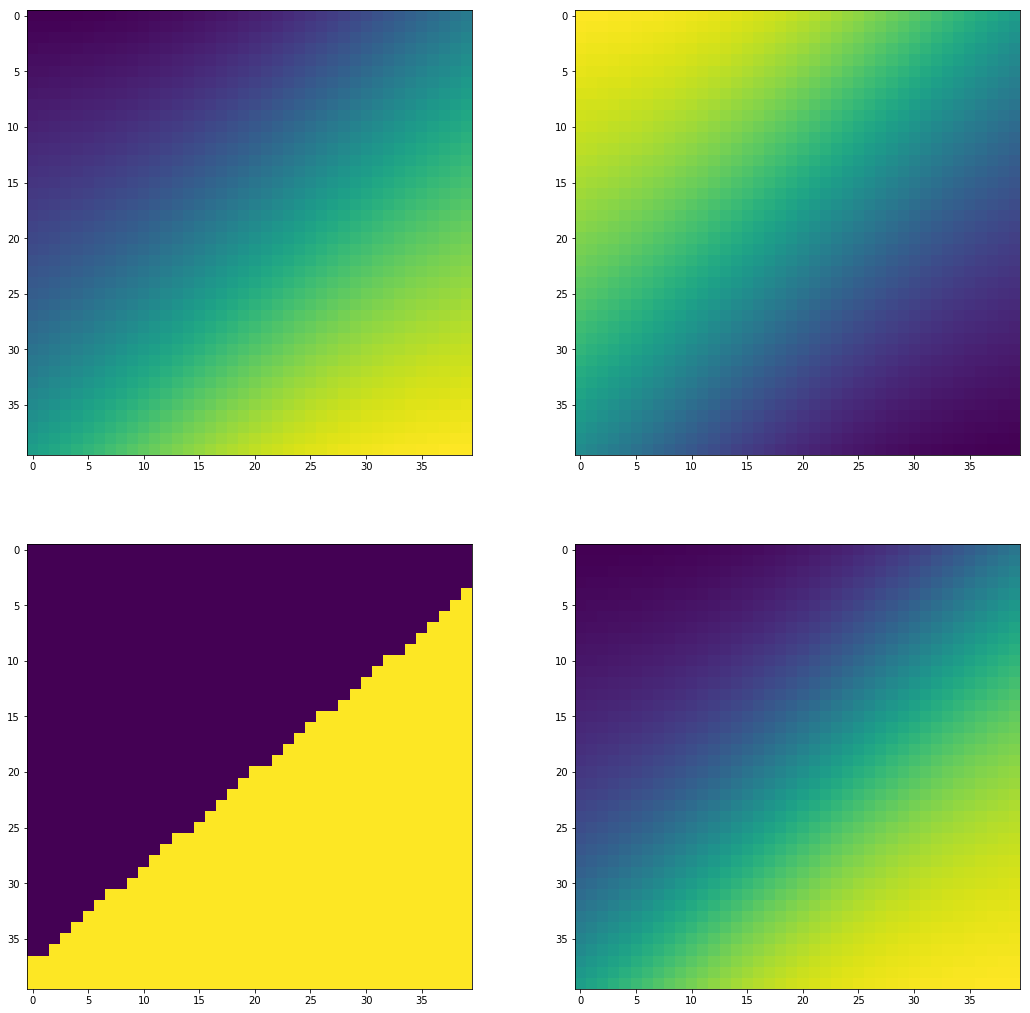

In [16]:


r = np.arange(-1,1,0.05)
res = np.zeros((len(r), len(r),2), np.double)
for i,x1 in enumerate(r):
    for j,x2 in enumerate(r):
        res[i,j,:] = net.forward(torch.FloatTensor([x1,x2])).detach().numpy()
        

plt.subplots(2,2, figsize=(18,18))
plt.subplot(2,2,1)
plt.imshow(res[:,:,0])
plt.subplot(2,2,2)
plt.imshow(res[:,:,1])
plt.subplot(2,2,3)
plt.imshow(res[:,:,1] < res[:,:,0])

smx = softmax(res,axis=2)
plt.subplot(2,2,4)
plt.imshow(smx[:,:,0])

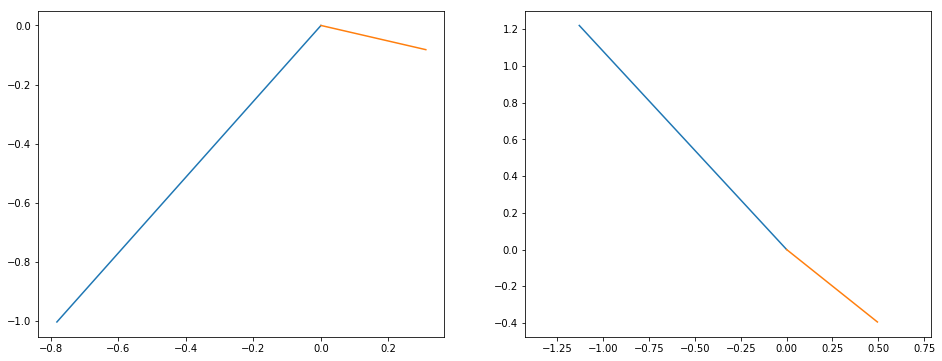

In [15]:
w1 = net.fc1.weight.detach().numpy().T
w2 = net.fc2.weight.detach().numpy().T

segs1 = columns_as_line_ends(w1)

segs2 = columns_as_line_ends(w2)

plt.subplots(1,2, figsize=(16,6))
plt.subplot(1,2,1)
for x,y in zip(segs1["x"], segs1["y"]):
    plt.plot(x,y)


plt.subplot(1,2,2)
for x,y in zip(segs2["x"], segs2["y"]):
    plt.plot(x,y)
_=plt.axis('equal')

In [6]:
# useful commands
# check fan-out of layer
print(net.fc1.out_features)
# print out the weight matrix and bias
print(net.fc1.weight.detach().numpy().T)
print(net.fc1.bias.detach())
print()
print(net.fc2.weight.detach().numpy().T)
print(net.fc2.bias.detach())

#u,s,vh = svd(W, full_matrices=False)
np.arctan2(u[1,0],u[0,0])*180/np.pi

2
[[-0.7824788   0.31062293]
 [-1.002895   -0.08182228]]
tensor([0., 0.])

[[-1.1303688   0.49495733]
 [ 1.2215153  -0.39498782]]
tensor([0., -0.])


In [19]:
res[:,:,0].shape

(40, 40)

0.023015109222204653 0.08159106180045707


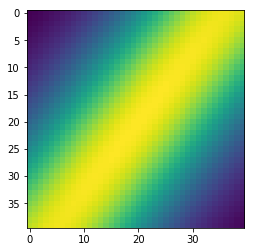

In [26]:
grad_x,grad_y = np.gradient(res[:,:,0])
grad_m = np.sqrt(grad_x * grad_x + grad_y * grad_y)
plt.imshow(grad_m)
print(grad_m.min(), grad_m.max())


<BarContainer object of 20 artists>

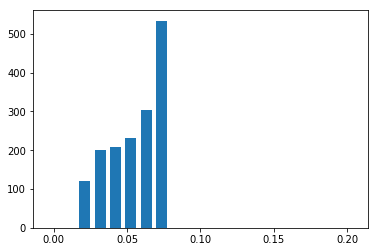

In [38]:
b = 20
grad_m_bins = np.linspace(0,0.2,b)
grad_m_hist = np.zeros(b, np.double)
for i in range(b-1):
    grad_m_hist[i] = ((grad_m > grad_m_bins[i]) & (grad_m < grad_m_bins[i+1])).sum()
v

In [29]:
np.array([True, True, False, False]) & np.array([True, False, True, False])

array([ True, False, False, False])

In [51]:

train_points = [np.random.uniform(-1,1,2) for _ in range(2000)]
train_labels = [np.argmax(net.forward(torch.FloatTensor(x)).detach().numpy()) for x in train_points]


for i in range(25):
    print("{:.3f}, {:.3f}: {}\n".format(*train_points[i],train_labels[i]))

-0.757, 0.278: 1

0.068, 0.925: 0

0.242, 0.421: 0

0.198, 0.405: 0

0.996, 0.010: 0

-0.226, 0.107: 1

-0.487, 0.279: 1

-0.985, -0.680: 1

0.149, 0.466: 0

-0.269, -0.070: 1

-0.769, -0.123: 1

-0.850, 0.772: 1

-0.335, 0.558: 0

-0.802, -0.063: 1

-0.354, -0.350: 1

-0.617, 0.312: 1

-0.054, -0.418: 1

0.710, 0.255: 0

-0.187, -0.173: 1

-0.317, 0.409: 0

0.612, 0.435: 0

-0.436, 0.609: 0

0.322, 0.915: 0

-0.033, 0.760: 0

0.078, -0.349: 1



In [118]:
#reload my code if changed
from importlib import reload
reload(understand)
from understand import *

In [119]:
net2= copy_net(net)

In [120]:

net2.trainnn(list(zip(train_points,train_labels)),5)

epoch 0
[1,  2000] loss: 0.045
epoch 1
[2,  2000] loss: 0.039
epoch 2
[3,  2000] loss: 0.035
epoch 3
[4,  2000] loss: 0.034
epoch 4
[5,  2000] loss: 0.030


In [121]:
net2.fc1.weight.detach().numpy()

array([[-7.089471 , -6.031622 ],
       [ 5.384337 ,  3.4386604]], dtype=float32)

In [122]:
net2.fc2.weight.detach().numpy()

array([[-3.2989087,  2.680787 ],
       [ 2.6634865, -1.8542372]], dtype=float32)

In [123]:
import dill
fname = 'scratch2.pkl'
dill.dump_session(fname)

PicklingError: Can't pickle <class 'understand.Mlp2'>: it's not the same object as understand.Mlp2

In [97]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()


In [98]:
input.dim()

2

In [100]:
input.detach().numpy()

array([[-0.5242882 , -0.60836935,  0.84957016, -1.2159452 , -0.69696486],
       [ 0.010528  , -1.0784576 , -0.31595308,  1.7149878 , -0.6076564 ],
       [ 0.26026   , -0.39930773,  1.6459363 ,  0.03195045, -0.53935647]],
      dtype=float32)

In [101]:
target.dim()


1

In [104]:
target.numpy()

array([4, 1, 3])

In [103]:
type(target
    )

torch.Tensor

In [105]:
torch.Tensor([4,1,3])

tensor([4., 1., 3.])